<a href="https://colab.research.google.com/github/Wang-Ruhua/CO2Level/blob/main/Time_Series_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis Project - CO2 Level

## Contents


* [Part 1: Exploratory Data Exploration](#Part-1:Exploratory-Data-Exploration)
* [Part 2: Data Preprocessing](#Part-2:-Data-Preprocessing)
* [Part 3: Model Training](#Part-3:-Model-Training)
* [Part 4: Result Evaluation](#Part-3:-Result-Evaluation)

# Part 0: Setup PyDrive

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive2

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1JJB4SO5XCq_B3TVbYe57c4RDQ6-xV074"

file = drive.CreateFile({'id':id})
file.GetContentFile('co2_level_data.csv')

# Part 1: Exploratory Data Exploration

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('co2_level_data.csv', parse_dates=['date'])
display(df.head(10))

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
5,1958-05-03,316.9
6,1958-05-10,NaN
7,1958-05-17,317.5
8,1958-05-24,317.9
9,1958-05-31,NaN


In [ ]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2284 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB


In [ ]:
# Check data statistics
df.describe()

,date,co2
count,2284,2225.000000
mean,1980-02-12 12:00:00,340.142247
min,1958-03-29 00:00:00,313.000000
25%,1969-03-06 06:00:00,324.800000
50%,1980-02-12 12:00:00,338.300000
75%,1991-01-20 18:00:00,354.800000
max,2001-12-29 00:00:00,373.900000
std,NaN,17.003885


In [ ]:
# Check duplicates
df_duplicated = df.duplicated()
num_duplicated = len(df[df_duplicated])
print(f'Number of duplicated rows: {num_duplicated}')

Number of duplicated rows: 0


In [ ]:
# Check missing values
df.isnull().sum()

,0
date,0
co2,59


In [ ]:
# Set 'date' to be index column
df.set_index('date', inplace=True)

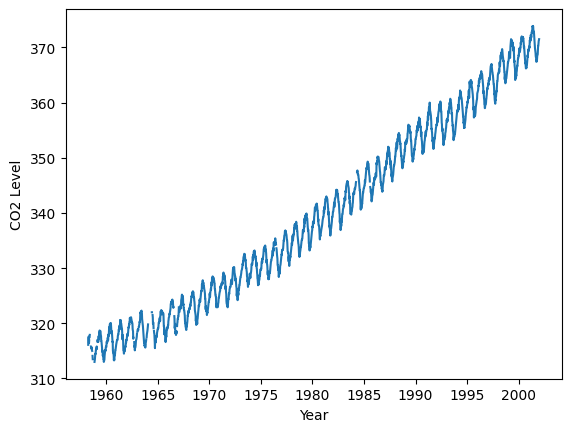

In [ ]:
# Visualize dataset
import matplotlib.pyplot as plt

plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.plot(df)

# Part 2: Data Preprocessing

In [ ]:
# Resample to monthly
y = df['co2'].resample('MS').mean()
y.head()

,co2
date,
1958-03-01,316.100000
1958-04-01,317.200000
1958-05-01,317.433333
1958-06-01,NaN
1958-07-01,315.625000


In [ ]:
# check missing values again
y.isnull().sum()

5

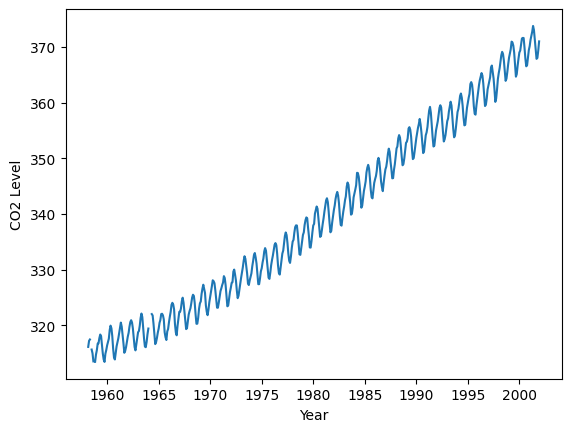

In [ ]:
# Visualize data
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.plot(y)

In [ ]:
# Impute missing data by backfill
y.fillna(method='bfill', inplace=True)

<ipython-input-192-8cb4d51c99f3>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y.fillna(method='bfill', inplace=True)


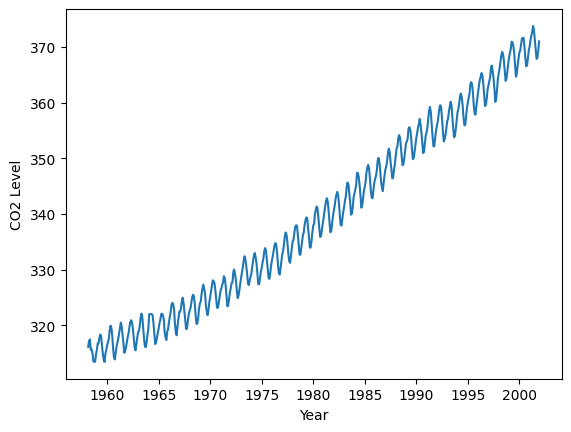

In [ ]:
# Visualize data
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.plot(y)

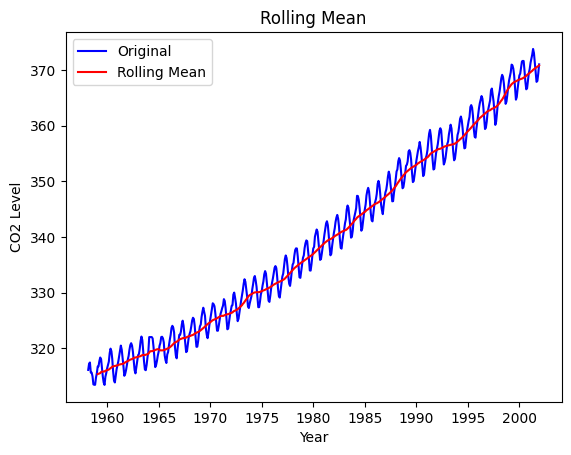

In [ ]:
# Plot rolling mean
rolling_mean = y.rolling(window=12).mean()
plt.plot(y, color='blue', label='Original')
plt.plot(rolling_mean , color='red', label='Rolling Mean')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Rolling Mean')
plt.legend(loc='best')
plt.show()

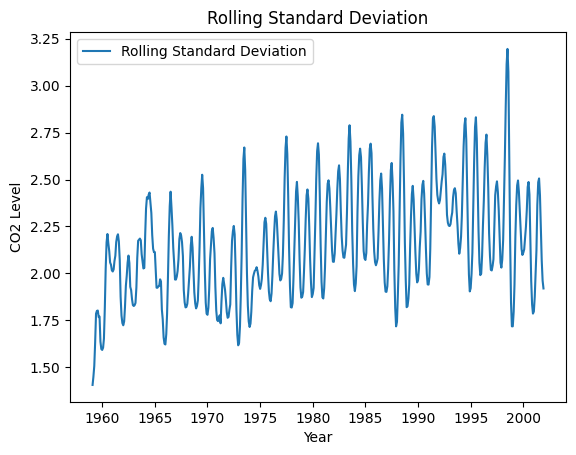

In [ ]:
# Plot rolling standard deviation
rolling_std = y.rolling(window=12).std()
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Rolling Standard Deviation')
plt.legend(loc='best')
plt.show()

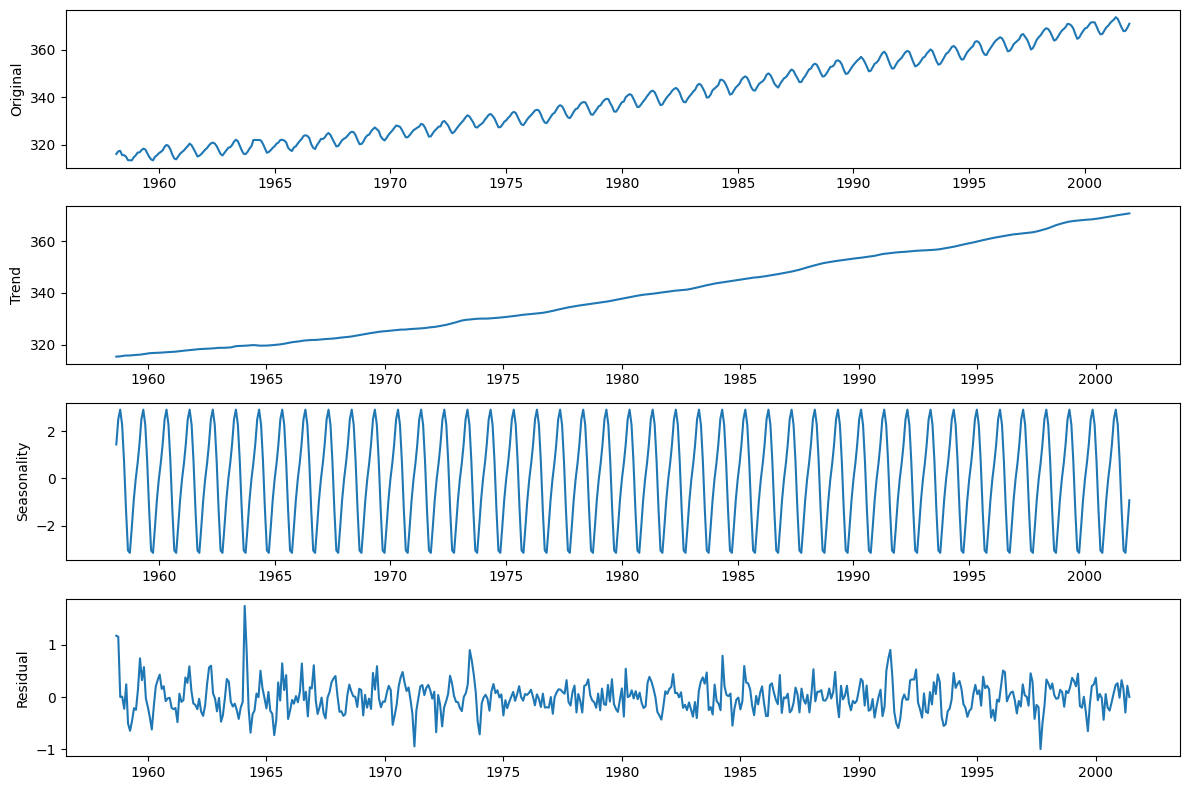

In [ ]:
# Decompose y into trend, seasonality, and residual
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(y, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(y)
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

In [ ]:
# Check missing values for residual
residual.isnull().sum()

12

In [ ]:
# Locate missing values
residual[residual.isnull()]

,resid
date,
1958-03-01,NaN
1958-04-01,NaN
1958-05-01,NaN
1958-06-01,NaN
1958-07-01,NaN
1958-08-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN


In [ ]:
# Impute missing values
residual.fillna(method='bfill', inplace=True)
residual.fillna(method='ffill', inplace=True)

<ipython-input-199-6f3cc6dfcb77>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  residual.fillna(method='bfill', inplace=True)
<ipython-input-199-6f3cc6dfcb77>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  residual.fillna(method='ffill', inplace=True)


In [ ]:
# Recheck missing values
residual.isnull().sum()

0

In [ ]:
# Analyze residuals
residual.describe()

,resid
count,526.000000
mean,0.016137
std,0.320423
min,-0.997063
25%,-0.192372
50%,-0.000486
75%,0.169395
max,1.745334


In [ ]:
# Augmented Dickey–Fuller (ADF) test of residual stationarity
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(residual)
# print('ADF Statistic: %f' % adf_result[0])
# print('p-value: %f' % adf_result[1])
# print('Critical Values:')
# for key, value in adf_result[4].items():
# 	print('\t%s: %.3f' % (key, value))

print(f"ADF Statistics is: {adf_result[0]:.3f}")
print(f"ADF p-value is: {adf_result[1]:.3f}")
print("Critical values are:")
for key, value in adf_result[4].items():
  print(f"{key}: {value:.3f}")
print()

if adf_result[1] > 0.05:
    print('The residual is not stationary based on 0.05 significant level.')
else:
    print('The residual is stationary based on 0.05 significant level.')

ADF Statistics is: -12.182
ADF p-value is: 0.000
Critical values are:
1%: -3.443
5%: -2.867
10%: -2.570

The residual is stationary based on 0.05 significant level.


# Part 3: Model Training

<Figure size 1200x600 with 0 Axes>

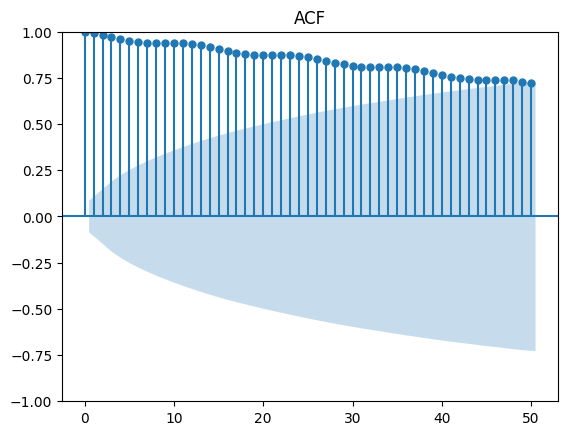

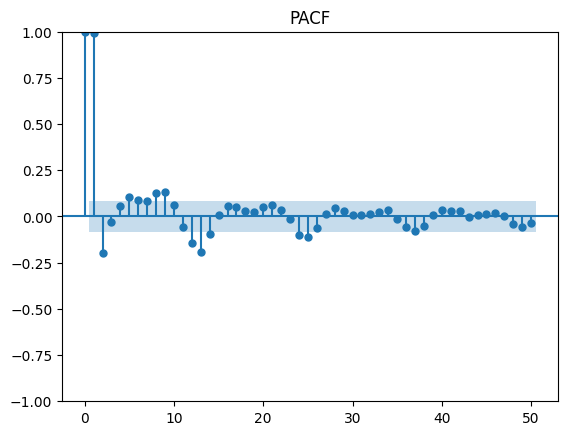

In [ ]:
# Plot ACF and PACF for entire dataset
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(y, lags=50, title="ACF");
plot_pacf(y, lags=50, title="PACF");
plt.show()

In [ ]:
# Split dataset into in-sample dataset and out-sample dataset
in_sample = y[:'1998-12-01']
out_sample =  y['1999-01-01':]

<Figure size 1200x600 with 0 Axes>

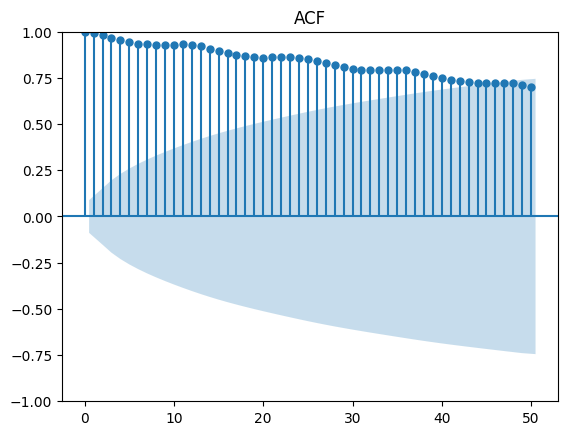

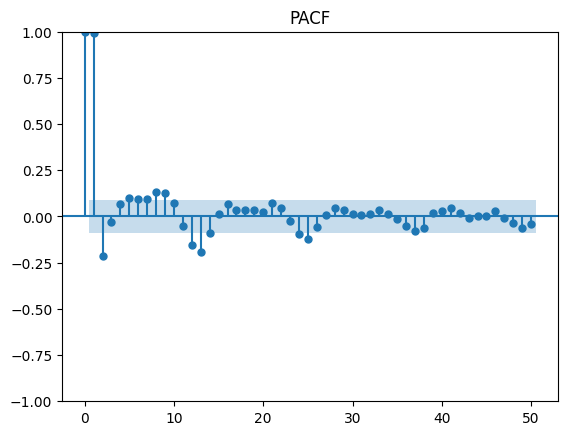

In [ ]:
# Plot ACF and PACF for in-sample dataset

plt.figure(figsize=(12, 6))
plot_acf(in_sample, lags=50, title="ACF");
plot_pacf(in_sample, lags=50, title="PACF");
plt.show()

In [ ]:
# Seasonal ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(in_sample, seasonal_order=(2, 1, 3, 12))
results = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


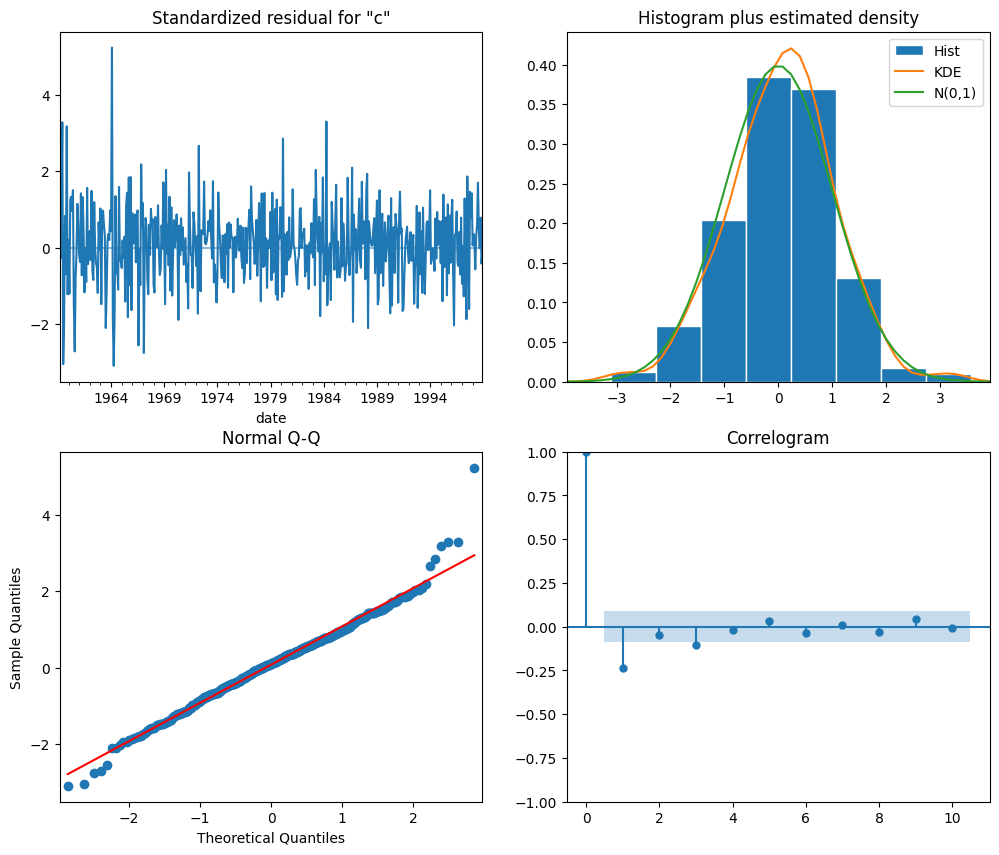

In [ ]:
# Print seasonal ARIMA model results
results.plot_diagnostics(figsize=(12, 10))
plt.show()

# Part 4: Result Evaluation

### Part 4.1: In-sample evaluation

In [ ]:
# In-sample prediction
predictions = results.get_prediction(start='1960-01-01', end='1998-12-01', dynamic=False)
predictions_ci = predictions.conf_int()
predictions_mean = predictions.predicted_mean

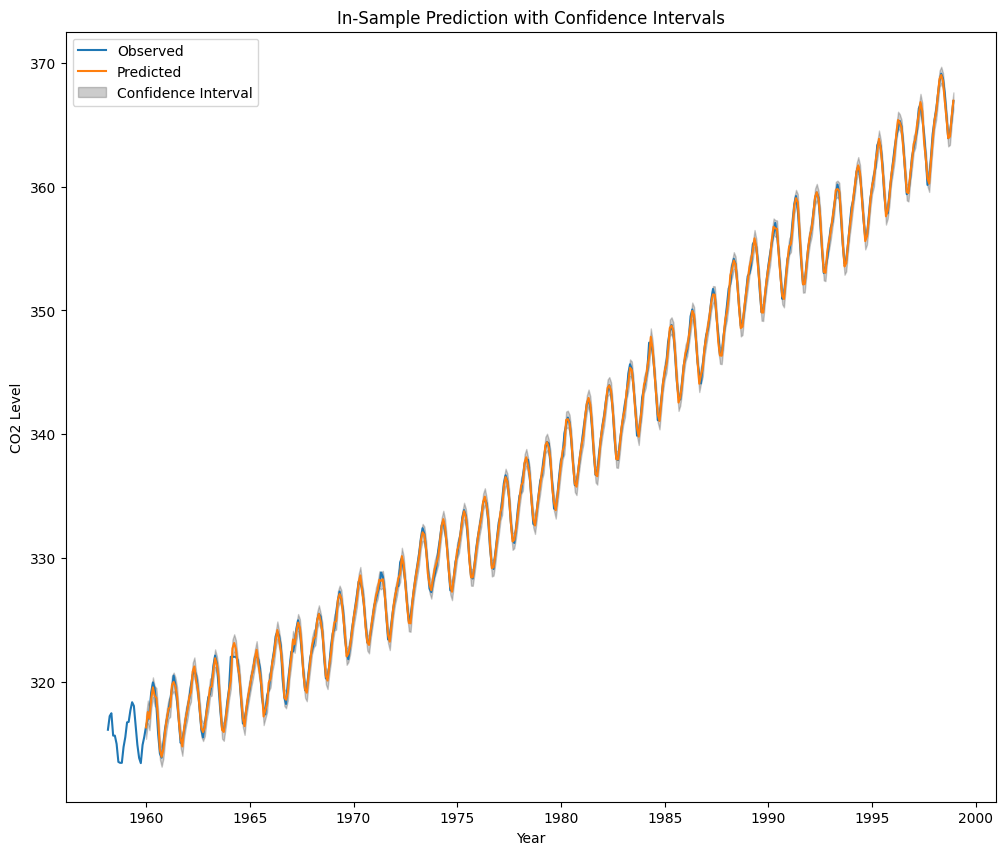

In [ ]:
# Plot in-sample prediction
plt.figure(figsize=(12, 10))
plt.plot(in_sample, label='Observed')
plt.plot(predictions_mean, label='Predicted')
plt.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='k', alpha=.2, label='Confidence Interval')

plt.legend()
plt.title('In-Sample Prediction with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.show()

In [ ]:
# Evaluate out-sample test
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(in_sample['1960-01-01':], predictions_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(in_sample['1960-01-01':], predictions_mean)

print('In-sample evaluation:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

In-sample evaluation:
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.34
Mean Absolute Error (MAE): 0.27


### Part 4.2: Out-sample evaluation

In [ ]:
# In-sample prediction
predictions = results.get_prediction(start='1999-01-01', end='2001-12-01', dynamic=False)
predictions_ci = predictions.conf_int()
predictions_mean = predictions.predicted_mean

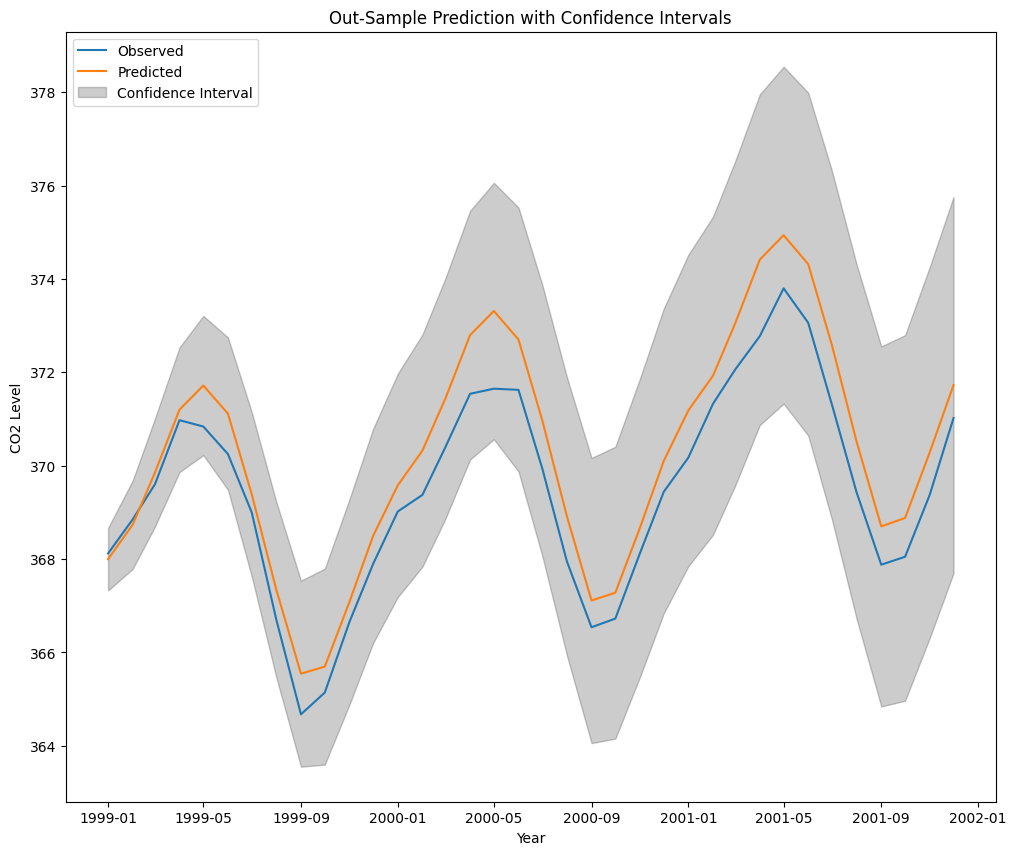

In [ ]:
# Plot out-sample prediction
plt.figure(figsize=(12, 10))
plt.plot(out_sample, label='Observed')
plt.plot(predictions_mean, label='Predicted')
plt.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='k', alpha=.2, label='Confidence Interval')

plt.legend()
plt.title('Out-Sample Prediction with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.show()

In [ ]:
# Evaluate out-sample test
mse = mean_squared_error(out_sample, predictions_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(out_sample, predictions_mean)

print('Out-sample evaluation:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Out-sample evaluation:
Mean Squared Error (MSE): 0.79
Root Mean Squared Error (RMSE): 0.89
Mean Absolute Error (MAE): 0.81
